In [232]:
!pip install pandas pyreadstat openpyxl
import pandas as pd
df = pd.read_stata(r"/Users/zowi/Desktop/Big Data/GitHub/E337-Grupo3/data_unificado_normalizado.dta")
#df = pd.read_stata(r"C:\Users\caval\Desktop\E337-Grupo3\data_unificado_normalizado.dta")


In [234]:
# Convertir fechas a string si existen columnas datetime
for col in df.select_dtypes(include=["datetime64"]).columns:
    df[col] = df[col].astype(str)

# Convertir todas las columnas 'object' a string y reemplazar NaN
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].astype(str).replace("nan", "").replace("None", "")

# Revisar si hay columnas problemáticas
for col in df.columns:
    if df[col].dtype == "object":
        try:
            df[col].astype(str)  # Intentamos asegurarnos de que todas sean strings
        except Exception as e:
            print(f"Error en la columna {col}: {e}")

In [236]:
#Guardamos la base
df.to_stata(r"C:\Users\caval\Desktop\E337-Grupo3\dataframe.dta")
#df.to_stata(r"/Users/zowi/Desktop/Big Data/GitHub/E337-Grupo3/dataframe.dta")

In [237]:
#Filtramos la variable aglomerado
provincias = ['jujuy - palpala', 'salta', 'santiago del estero - la banda', '18', '19', '23']
df = df[df['aglomerado'].isin(provincias)]

In [240]:
#Vemos que valores toma cada variable 
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Valores únicos en '{col}':")
    print(unique_values)
    print("-" * 50)  # Separador entre variables

Valores únicos en 'codusu':
['125624' '125666' '125788' ... 'tqrmnorpyhmlkncdehjgh00800782'
 'tqrmnotrqhlokmcdegoih00853445' 'tqrmnoptphjolscdehjgh00797862']
--------------------------------------------------
Valores únicos en 'nro_hogar':
[1. 2. 3. 4. 5.]
--------------------------------------------------
Valores únicos en 'componente':
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0' '10.0' '11.0'
 '12.0' '13.0' '14.0' 'servicio domestico en hogares' '15.0' '1' '2' '3'
 '4' '5' '6' '7' '8' '9' '10' '11' '12' '13']
--------------------------------------------------
Valores únicos en 'h15':
['si' '0.0' '1' '0' '2']
--------------------------------------------------
Valores únicos en 'ano4':
[2004. 2024.]
--------------------------------------------------
Valores únicos en 'trimestre':
['1er. trimestre' '1']
--------------------------------------------------
Valores únicos en 'region':
['noa' '40']
--------------------------------------------------
Valores únicos en 'mas_500':
['n

In [242]:
#Unificamos valores de componente
df['componente'] = df['componente'].replace({
    'servicio domestico en hogares': 51, 
    'Pensionistas en hogares': 71
})

df['componente'] = df['componente'].astype(float).astype(int)
print(df['componente'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 51 15]


In [244]:
#Unificamos valores en h15
df['h15'] = df['h15'].replace({
    'si': 1, 
    'no': 2
})
df['h15'] = df['h15'].astype(float).astype(int)
print(df['h15'].unique())

[1 0 2]


In [246]:
import numpy as np 

In [248]:
#Unificamos valores en trimestre
df['trimestre'] = df['trimestre'].replace({
    '1er. trimestre': 1
})
df['trimestre'] = df['trimestre'].astype(float).astype(int)
print(df['trimestre'].unique())

[1]


In [250]:
#Unificamos valores en region
df['region'] = df['region'].replace({
    'noa': 40
})
df['region'] = df['region'].astype(float).astype(int)
print(df['region'].unique())

[40]


In [252]:
#Unificamos valores en aglomerado
df['aglomerado'] = df['aglomerado'].replace({
    'santiago del estero - la banda': 18,
    'jujuy - palpala': 19,
    'salta': 23
})
df['aglomerado'] = df['aglomerado'].astype(int)
print(df['aglomerado'].unique())

[18 19 23]


In [254]:
#Unificamos valores en ch03
import numpy as np 
df['ch03'] = df['ch03'].replace({
    'jefe': 1, 
    'conyuge/pareja': 2,
    'hijo/hijastro': 3,
    'yerno/nuera': 4,
    'nieto': 5,
    'madre/padre': 6,
    'suegro': 7,
    'hermano': 8,
    'otros familiares': 9,
    'no familiares': 10
})
df['ch03'] = df['ch03'].astype(int)
print(df['ch03'].unique())

[ 1  2  3  5  6  8  9  4 10  7]


In [256]:
#Unificamos valores en ch04
df['ch04'] = df['ch04'].replace({
    'varon': 1,
    'mujer': 2
})
df['ch04'] = df['ch04'].astype(int)
print(df['ch04'].unique())

[2 1]


In [258]:
df['ch07'] = df['ch07'].astype(str)  # Asegura que todo es string antes del reemplazo
df['ch07'] = df['ch07'].replace({
    'casado': 2,
    'soltero': 5,
    'unido': 1,
    'separado o divorciado': 3,
    'viudo': 4
})
print(df['ch07'].unique())

[3 1 5 2 4 '3' '5' '2' '1' '4']


In [260]:
#Unificamos valores en ch08
df['ch08'] = df['ch08'].replace({
    'no paga ni le descuentan': 4,
    'mutual/prepaga/servicio de emergencia': 2,
    'obra social (incluye pami)': 1,
    'obra social y mutual/prepaga/servicio de emergencia': 12,
    'obra social y planes y seguros publicos': 13, 
    'ns./nr.': 9,
    'planes y seguros publicos': 3
})
df['ch08'] = df['ch08'].astype(int)
print(df['ch08'].unique())

[12  4  2  1  9  3 13 23]


In [262]:
#Unificamos valores en ch09
df['ch09'] = df['ch09'].replace({
    'si': 1,
    'no': 2, 
    'menor de 2 anos': 3
})
df['ch09'] = df['ch09'].astype(int)
print(df['ch09'].unique())

[1 2 3]


In [38]:
import numpy as np 

In [264]:
#Unificamos valores en ch10
#Unificamos valores en ch10
df['ch10'] = df ['ch10'].replace({
    '0': np.nan, 
    'no asiste, pero asistio': 2, 
    'si, asiste': 1, 
    'nunca asistio': 3,
    '0.0': np.nan
})
print(df['ch10'].unique())

[2 1 3 nan '2' '1' '3']


In [266]:
#Unificamos valores en ch11
df['ch11'] = df ['ch11'].replace({
    '0': np.nan,
    '0.0': np.nan,
    'privado': 2, 
    'publico': 1, 
    'ns./nr.': 9
})
print(df['ch11'].unique())

[nan 1 2 9 '1' '2']


In [268]:
#Unificamos valores en ch12
df['ch12'] = df ['ch12'].replace({
    'secundario': 4,
    'polimodal': 5,
    'egb': 3,
    'primario': 2,
    'terciario': 6,
    '0': np.nan,
    '0.0': np.nan,
    'universitario': 7,
    'jardin/preescolar': 1,
    'educacion especial (discapacitado)': 9,
    'posgrado universitario': 8
})
print(df['ch12'].unique())

[2 4 5 3 nan 1 6 7 8 9 '2' '4' '6' '7' '1' '3' '9' '8' '5']


In [270]:
#Unificamos valores en ch13
df['ch13'] = df ['ch13'].replace({
    '0': np.nan,
    '0.0': np.nan,
    'no': 2, 
    'si': 1
})
print(df['ch13'].unique())

[1 2 nan '1' '2']


In [272]:
#Unificamos valores en ch14
df['ch14'] = df ['ch14'].replace({
    '': np.nan
})
print(df['ch14'].unique())

[nan '01' '00' '06' '04' '02' '03' '07' '05' '99' '08' '09' '98' '2.0'
 '4.0' '3.0' '1.0' '0.0' '6.0' '5.0' '98.0' '99.0' '9.0']


In [274]:
#Unificamos valores en ch15
df['ch15'] = df ['ch15'].replace({
    'en esta localidad': 1,
    'en otra provincia (especificar)': 3,
    'en otro pais': 5,
    'en otra localidad': 2,
    'en un pais limitrofe': 4
})
df['ch15'] = df['ch15'].astype(int)
print(df['ch15'].unique())

[2 1 3 5 4]


In [276]:
#Unificamos valores en ch16
df['ch16'] = df ['ch16'].replace({
    'en esta localidad': 1,
    'no habia nacido': 6,
    'en otra localidad de esta provincia': 2,
    'en otra provincia (especificar)': 3,
     'en un pais limitrofe': 4,
    'en otro pais': 5
})
df['ch16'] = df['ch16'].astype(int)
print(df['ch16'].unique())

[1 2 6 3 5 4]


In [278]:
#Unificamos valores en nivel_ed
df['nivel_ed'] = df ['nivel_ed'].replace({
    'primaria incompleta (incluye educacion especial)': 1,
    'primaria completa': 2,
    'secundaria incompleta': 3,
    'secundaria completa': 4,
    'superior universitaria incompleta': 5,
    'superior universitaria completa': 6,
    'sin instruccion': 7,
    'ns./nr.': 9
})
df['nivel_ed'] = df['nivel_ed'].astype(int)
print(df['nivel_ed'].unique())

[2 3 1 4 7 6 5]


In [280]:
#Unificamos valores en estado
df['estado'] = df ['estado'].replace({
    'entrevista individual no realizada (no respuesta al cuestion': 0,
    'ocupado': 1,
    'desocupado': 2,
    'inactivo': 3,
    'menor de 10 anos': 4
})
df['estado'] = df['estado'].astype(int)
print(df['estado'].unique())

[3 2 4 1 0]


In [282]:
#Unificamos valores en cat_ocup
df['cat_ocup'] = df ['cat_ocup'].replace({
    'patron': 1,
    'cuenta propia': 2,
    'obrero o empleado': 3,
    'trabajador familiar sin remuneracion': 4,
    'ns/nr': 9
})
print(df['cat_ocup'].unique())

['0.0' 2 3 1 4 '3' '0' '2' '1' '4']


In [284]:
# Unificamos valores en cat_inac
df['cat_inac'] = df['cat_inac'].replace({
    'jubilado/pensionado': 1,
    'rentista': 2,
    'estudiante': 3,
    'ama de casa': 4,
    'menor de 6 anos': 5,
    'discapacitado': 6,
    'otros': 7
})
print(df['cat_inac'].unique())

[1 '0.0' 4 3 5 7 6 2 '0' '1' '7' '3' '4' '2' '5' '6']


In [104]:
import numpy as np

In [286]:
# Unificamos de una sola vez a TODAS aquellas variables que tomen valor si o no en una base y 1 y 2 en la otra. 
variables = ['pp02c1', 'pp02c2', 'pp02c3', 'pp02c4', 'pp02c5', 'pp02c6', 'pp02c7', 'pp02c8', 'pp02h','pp02i', 'pp03g', 'pp03i', 'pp03j', 'pp05e', 'pp06a', 'pp06h', 'pp07f1', 'pp07f2', 'pp07f3', 'pp07f4', 'pp07g1', 'pp07g2', 'pp07g3', 'pp07g4', 'pp07g_59', 'pp07h', 'pp07i', 'pp09b', 'pp10c', 'pp10d', 'pp11n', 'pp11p', 'pp11q', 'pp11r', 'pp11s', 'pp11t']

# Aplicamos las transformaciones a cada variable
for var in variables:
    df[var] = df[var].replace({
        'no': 2,
        'si': 1,
        '0': np.nan,
        '0.0': np.nan,
        '': np.nan,
        'ns./nr.': 9,
        '5.0': np.nan
    })

    print(f"Valores únicos en {var}: {df[var].unique()}")

Valores únicos en pp02c1: [nan 2 1 '2' '1']
Valores únicos en pp02c2: [nan 2 1 '1' '2']
Valores únicos en pp02c3: [nan 1 2 '2' '1']
Valores únicos en pp02c4: [nan 2 1 '2' '1']
Valores únicos en pp02c5: [nan 1 2 '2' '1']
Valores únicos en pp02c6: [nan 1 2 '2' '1']
Valores únicos en pp02c7: [nan 2 1 '2' '1']
Valores únicos en pp02c8: [nan 2 1 '2' '1']
Valores únicos en pp02h: [2 nan 1 '2' '1']
Valores únicos en pp02i: [2 nan 1 '2' '1']
Valores únicos en pp03g: [nan 2 1 '2.0' '1.0']
Valores únicos en pp03i: [nan 2 1 9 '2.0' '1.0' '9.0']
Valores únicos en pp03j: [nan 2 1 '2.0' '1.0']
Valores únicos en pp05e: [nan 1 2 '1.0' '2.0']
Valores únicos en pp06a: [nan 1 2 '2.0' '1.0']
Valores únicos en pp06h: [nan 1 2 '2.0' '1.0']
Valores únicos en pp07f1: [nan 2 1 '2.0' '1.0' '9.0']
Valores únicos en pp07f2: [nan 2 1 '2.0' '1.0' '9.0']
Valores únicos en pp07f3: [nan 2 1 '2.0' '1.0']
Valores únicos en pp07f4: [nan 2 1 '2.0' '1.0']
Valores únicos en pp07g1: [nan 1 2 '1.0' '2.0']
Valores únicos en pp

/var/folders/qv/cfqltfhj5ys0ymt_tsnsthmh0000gn/T/ipykernel_74004/1479017061.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[var] = df[var].replace({


In [288]:
# Unificamos valores en pp02e
df['pp02e'] = df['pp02e'].replace({
    'esta suspendido': 1,
    'ya tiene trabajo asegurado': 2,
    'se canso de buscar trabajo': 3,
    'hay poco trabajo en esta epoca del ano': 4,
    'por otras razones': 5
})
print(df['pp02e'].unique())

['0.0' 3 4 5 '0' '5' '4' '3' '2']


In [290]:
# Unificamos valores en pp03c
df['pp03c'] = df['pp03c'].replace({
    '...un solo empleo/ocupacion/actividad?': 1,
    '...mas de un empleo/ocupacion/actividad?': 2,
    '': np.nan
})
print(df['pp03c'].unique())

['0.0' 1 2 '1.0' nan '2.0']


In [292]:
# Unificamos valores en pp03g
df['pp03g'] = df['pp03g'].replace({
    'si': 1,
    'no': 2,
    '': np.nan
})
print(df['pp03g'].unique())

[nan 2 1 '2.0' '1.0']


In [294]:
# Unificamos valores en pp03h
df['pp03h'] = df['pp03h'].replace({
    '...podia trabajarlas esa semana?': 1,
    '...podia empezar a trabajarlas en dos semanas a mas tardar?': 2,
    '...no podia trabajar mas horas?': 3,
    '': np.nan
})
print(df['pp03h'].unique())

['0.0' 1 3 2 nan '1.0' '3.0' '2.0' '9.0']


In [296]:
# Unificamos valores en pp03i
df['pp03i'] = df['pp03i'].replace({
    'si': 1,
    'no': 2,
    'ns./nr.': 9,
    '': np.nan
})
print(df['pp03i'].unique())

[nan 2 1 9 '2.0' '1.0' '9.0']


In [298]:
# Unificamos valores en pp03j
df['pp03j'] = df['pp03j'].replace({
    'si': 1,
    'no': 2,
    'ns/nr': 9,
    '': np.nan
})
print(df['pp03j'].unique())

[nan 2 1 '2.0' '1.0']


In [300]:
# Unificamos valores en pp04a
df['pp04a'] = df['pp04a'].replace({
    '...estatal?': 1,
    '...privada?': 2,
    '...de otro tipo? (especificar)': 3,
    '': np.nan
})
print(df['pp04a'].unique())

['0.0' 2 3 1 '2.0' nan '1.0' '3.0']


In [302]:
# Unificamos valores en pp04b1
df['pp04b1'] = df['pp04b1'].replace({
    'casa de familia': 1,
    '': np.nan
})
print(df['pp04b1'].unique())

['0.0' '2.0' 1 nan '1.0']


In [304]:
# Unificamos valores en pp04c
df['pp04c'] = df['pp04c'].replace({
    '1 persona': 1,
    '2 personas': 2,
    '3 personas': 3,
    '4 personas': 4,
    '5 personas': 5,
    'de 6 a 10 personas': 6,
    'de 11 a 25 personas': 7,
    'de 26 a 40 personas': 8,
    'de 41 a 100 personas': 9,
    'de 101 a 200 personas': 10,
    'de 201 a 500 personas': 11,
    'mas de 500 personas': 12,
    'ns./nr.': 99,
    '': np.nan
})
print(df['pp04c'].unique())

['0.0' 8 2 7 9 10 4 3 11 99 6 1 5 12 '7.0' nan '3.0' '99.0' '8.0' '5.0'
 '10.0' '1.0' '2.0' '6.0' '4.0' '12.0' '9.0' '11.0']


In [306]:
# Unificamos valores en pp04c99
df['pp04c99'] = df['pp04c99'].replace({
    'hasta 5': 1,
    'de 6 a 40': 2,
    'mas de 40': 3,
    'ns./nr.': 9,
    '': np.nan
})
print(df['pp04c99'].unique())

['0.0' 9 3 2 1 nan '2.0' '9.0' '1.0' '3.0']


In [308]:
# Unificamos valores en pp04g
df['pp04g'] = df['pp04g'].replace({
    'en un local/oficina/establecimiento/negocio/taller/chacra/fi': 1,
    'en puesto o kiosco fijo callejero': 2,
    'en vehiculos: bicicleta/moto/auto/barco/bote (no incluye ser': 3,
    'en vehiculo para transporte de personas y mercaderias-aereo,': 4,
    'en obras en construccion, de infraestructura, mineria o simi': 5,
    'en esta vivienda': 6,
    'en la vivienda del socio o del patron': 7,
    'en el domicilio/local de los clientes': 8,
    'en la calle/espacios publicos/ambulante/de casa en casa/pues': 9,
    'en otro lugar': 10,
    '': np.nan
})
print(df['pp04g'].unique())

['0.0' 4 1 8 5 10 3 9 6 2 7 '4.0' nan '1.0' '9.0' '5.0' '8.0' '6.0' '3.0'
 '10.0' '7.0' '2.0']


In [310]:
# Unificamos valores en pp05c_1
df['pp05c_1'] = df['pp05c_1'].replace({
    'propio (del negocio)': 1,
    'prestado/alquilado': 2,
    'no tiene': 3,
    '': np.nan
})
print(df['pp05c_1'].unique())

['0.0' 1 3 2 nan '1.0' '3.0' '2.0']


In [312]:
# Unificamos valores en pp05c_2
df['pp05c_2'] = df['pp05c_2'].replace({
    'propio (del negocio)': 1,
    'prestado/alquilado': 2,
    'no tiene': 3,
    '': np.nan
})
print(df['pp05c_2'].unique())

['0.0' 1 3 2 nan '1.0' '3.0' '2.0']


In [314]:
# Unificamos valores en pp05c_3
df['pp05c_3'] = df['pp05c_3'].replace({
    'propio (del negocio)': 1,
    'prestado/alquilado': 2,
    'no tiene': 3,
    '': np.nan
})
print(df['pp05c_3'].unique())

['0.0' 3 1 2 nan '3.0' '1.0' '2.0']


In [332]:
# Unificamos valores en pp05f
df['pp05f'] = df['pp05f'].replace({
    'un solo cliente? (persona, empresa)': 6,
    'distintos clientes? (incluye publico en general)': 7,
    '': np.nan
})
print(df['pp05f'].unique())

['0.0' 7 6 nan '7.0' '6.0']


In [334]:
# Unificamos valores en pp05h
df['pp05h'] = df['pp05h'].replace({
    'menos de un mes': 1,
    'de 1 a 3 meses': 2,
    'mas de 3 a 6 meses': 3,
    'mas de 6 meses a 1 ano': 4,
    'mas de 1 a 5 anos': 5,
    'mas de 5 anos': 6,
    '': np.nan
})
print(df['pp05h'].unique())

['0.0' 3 6 1 5 2 4 nan '6.0' '5.0' '3.0' '4.0' '2.0' '1.0']


In [336]:
# Unificamos valores en pp06e
df['pp06e'] = df['pp06e'].replace({
    'es una sociedad juridicamente constituida? (s.a., s.r.l., co': 1,
    'es una sociedad de otra forma legal?': 2,
    'o es una sociedad convenida de palabra?': 3,
    '': np.nan
})
print(df['pp06e'].unique())


['0.0' 3 2 1 nan '3.0' '2.0']


In [386]:
#Unificamos valores en pp07a
df['pp07a'] = df['pp07a'].replace({
    '0.0': np.nan, 
    '': np.nan,
    'ns./nr.': 9,
    '...mas de 6 a 12 meses?': 4,
    '...menos de 1 mes?':1, 
    'mas de 5 anos':6, 
    'mas de 1 a 5 anos': 5,
    '...mas de 3 a 6 meses?': 3,
    '...de 1 a 3 meses?': 2
})

# Convertimos strings tipo '1.0', '2.0'... a enteros
df['pp07a'] = df['pp07a'].replace({
    '1.0': 1,
    '2.0': 2,
    '3.0': 3,
    '4.0': 4,
    '5.0': 5,
    '6.0' : 6,
    '9.0' : 9
})
# Convertimos strings tipo '1.0', '2.0'... a enteros
df['pp07a'] = df['pp07a'].replace({
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5,
    '6' : 6,
    '9' : 6
})
print(df['pp07a'].unique())

[nan 1 3 2 '...mas de 1 ano?' 4 5]


In [388]:
#Unificamos valores en pp07c
df['pp07c'] = df['pp07c'].replace({
    '0.0': np.nan, 
    '': np.nan,
    'ns./nr.': 9,
    'si (incluye changa, trabajo transitorio, por tarea u obra, s': 1,
    'no (incluye permanente, fijo, estable, de planta)': 2
})
print(df['pp07c'].unique())

[nan 2 9 1 '2.0' '9.0' '1.0']


In [390]:
#Unificamos valores en pp07d
df['pp07d'] = df['pp07d'].replace({
    '0.0': np.nan, 
    '': np.nan,
    'ns./nr.': 9,
    'solo fue esa vez/solo cuando lo llaman': 1,
    'mas de 6 a 12 meses': 4,
    'hasta 3 meses': 2,
    'mas de 3 a 6 meses': 3,
    'mas de 1 ano': 5
})
print(df['pp07d'].unique())

[nan 9 1 2 4 3 5 '9.0' '1.0' '4.0' '2.0' '5.0' '3.0']


In [392]:
#Unificamos valores en pp07e
df['pp07e'] = df['pp07e'].replace({
    '0.0': np.nan, 
    '': np.nan,
    '...un plan de empleo?': 1,
    'ninguno de estos': 4, 
    '...un periodo de prueba?': 2,
    '...una beca/pasantia/aprendizaje?': 3
})
print(df['pp07e'].unique())

[nan 4 1 2 3 '4.0' '1.0' '2.0' '3.0']


In [394]:
#Unificamos valores en pp07f5
df['pp07f5'] = df['pp07f5'].replace({
    '0.0': np.nan, 
    '': np.nan,
    'si': 5
})
print(df['pp07f5'].unique())

[nan 5 '5.0']


In [396]:
#Unificamos valores en pp07j
df['pp07j'] = df['pp07j'].replace({
    '0.0': np.nan,
    '': np.nan,
    '...de noche': 2,
    '...de otro tipo? (rotativo, dia y noche, guardias con franco' : 3,
    '...de dia? (manana/tarde)': 1
})
print(df['pp07j'].unique())

[nan 1 3 2 '1.0' '3.0' '2.0']


In [398]:
#Unificamos valores en pp07k
df['pp07k'] = df['pp07k'].replace({
    '0.0': np.nan,
    '': np.nan,
    'ns./nr.' : np.nan,
    '...le dan un papel/recibo sin nada?': 2,
    '...no le dan ni entrega nada?' : 4,
    '...entrega una factura?' : 3,
    'no cobra, es trabajador sin pago, ad-honorem' : 5,
    '...le dan recibo con sello/membrete/firma del empleador?': 1
})
print(df['pp07k'].unique())

[nan 1 4 5 2 3 '1.0' '4.0' '3.0' '2.0' '5.0']


In [400]:
#Unificamos valores en pp09a
import numpy as np 
df['pp09a'] = df['pp09a'].replace({
    '0.0': np.nan,
    '': np.nan
})
print(df['pp09a'].unique())

[nan]


In [402]:
#Unificamos valores en pp09a_esp
import numpy as np
df['pp09a_esp'] = df['pp09a_esp'].replace({
    '': np.nan
})
print(df['pp09a_esp'].unique())

[nan]


In [404]:
#Unificamos valores en pp09c
import numpy as np
df['pp09c'] = df['pp09c'].replace({
    '0.0': np.nan,
    '': np.nan
})
print(df['pp09c'].unique())

[nan]


In [406]:
#Unificamos valores en pp09c_esp
import numpy as np 
df['pp09c_esp'] = df['pp09c_esp'].replace({
    '': np.nan
})
print(df['pp09c_esp'].unique())

[nan]


In [666]:
import pandas as pd
#Unificamos valores en pp10a
df['pp10a'] = df['pp10a'].replace({
    '0.0': np.nan,
    '': np.nan,
    '...de 1 a 3 meses?': 2,
    '...mas de 6 a 12 meses?' : 4,
    '...mas de 3 a 6 meses?' : 3,
    '...mas de 1 ano?' : 5,
    '...menos de 1 mes?': 1
})

df['h15'] = df['h15'].astype(float).astype(int)
print(df['pp10a'].unique())

[nan '1' '3' '2' '5' '4']


In [410]:
#Unificamos valores en pp10e
df['pp10e'] = df['pp10e'].replace({
    '0.0': np.nan,
    '': np.nan,
    '...de 1 a 3 meses?': 2,
    '...mas de 6 a 12 meses?' : 4,
    '...mas de 3 a 6 meses?' : 3,
    '...mas de 1 a 3 anos?' : 5,
    '...mas de 3 anos?' : 6,
    '...menos de 1 mes?': 1
})
print(df['pp10e'].unique())

[nan 1 3 2 6 5 4 '2.0' '1.0' '5.0' '3.0' '6.0' '4.0']


In [412]:
#Unificamos valores en pp11a
df['pp11a'] = df['pp11a'].replace({
    '0.0': np.nan,
    '': np.nan,
    '...privada?': 2,
    '...estatal?': 1
})
print(df['pp11a'].unique())

[nan 2 1 '2.0' '1.0']


In [414]:
#Unificamos valores en pp11b1
df['pp11b1'] = df['pp11b1'].replace({
    '0.0': np.nan,
    '': np.nan,
    '2.0': np.nan,
    'casa de familia': 1
})
print(df['pp11b1'].unique())

[nan 1 '1.0']


In [416]:
#Unificamos valores en pp11c
df['pp11c'] = df['pp11c'].replace({
    '0.0': np.nan,
    '': np.nan,
    '2 personas': 2,
    '4 personas' : 4,
    '3 personas' : 3,
    '5 personas' : 5,
    'de 6 a 10 personas' : 6,
    'de 11 a 25 personas' : 7,
    'de 26 a 40 personas' : 8,
    'de 41 a 100 personas' : 9,
    'de 101 a 200 personas' : 10,
    'de 201 a 500 personas' : 11,
    'mas de 500 personas' : 12,
    'ns./nr.' : 99,
    '1 persona': 1
})
print(df['pp11c'].unique())

[nan 1 8 2 6 7 5 99 3 4 10 9 12 11 '1.0' '4.0' '99.0' '6.0' '2.0' '5.0'
 '3.0' '7.0' '11.0' '8.0' '9.0']


In [418]:
#Unificamos valores en pp11c99
df['pp11c99'] = df['pp11c99'].replace({
    '0.0': np.nan,
    '': np.nan,
    'ns./nr.' : 9,
    'hasta 5': 1
})
print(df['pp11c99'].unique())

[nan 9 1 '9.0' '2.0' '3.0']


In [420]:
#Unificamos valores en pp11l
df['pp11l'] = df['pp11l'].replace({
    '0.0': np.nan,
    '': np.nan,
    'falta de capital/equipamiento': 2,
    'tenia gastos demasiado altos' : 4,
    'trabajo estacional' : 3,
    'otras causas laborales (especificar)' : 5,
    'causas personales (matrimonio, embarazo, cuidado de hijos o' : 7,
    'falta de clientes/clientes que no pagan': 1
})
print(df['pp11l'].unique())

[nan 1 3 4 7 2 5 '3.0' '7.0' '5.0' '1.0']


In [422]:
#Unificamos valores en pp11l1
df['pp11l1'] = df['pp11l1'].replace({
    '0.0': np.nan,
    '': np.nan,
    '...un trabajo permanente, fijo estable, de planta, etc.?': 2,
    'ns./nr.' : 3,
    '...una changa, trabajo transitorio, por tarea u obra, suplen': 1
})
print(df['pp11l1'].unique())

[nan 1 2 3 '2.0' '1.0']


In [424]:
#Unificamos valores en pp11m
df['pp11m'] = df['pp11m'].replace({
    '0.0': np.nan,
    '': np.nan,
    '...un periodo de prueba?': 2,
    '...otro tipo de trabajo?' : 3,
    '...un plan de empleo?': 1
})
print(df['pp11m'].unique())

[nan 3 2 1 '3.0' '2.0']


In [426]:
#Unificamos valores en pp11o
df['pp11o'] = df['pp11o'].replace({
    '0.0': np.nan,
    '': np.nan,
    'por retiro voluntario del sector publico': 2,
    'por jubilacion' : 3,
    'fin del trabajo temporario/estacional' : 4,
    'le pagaban poco/no le pagaban' : 5,
    'malas relaciones laborales/malas condiciones de trabajo (ins' : 6,
    'renuncia obligada/pactada' : 7,
    'otras causas laborales' : 8,
    'por razones personales' : 9, 
    'despido/cierre': 1
})
print(df['pp11o'].unique())

[nan 4 6 1 5 2 8 7 9 3 '4.0' '1.0' '8.0' '5.0' '2.0' '9.0' '6.0']


In [428]:
#Unificamos valores decocur
df['decocur'] = df['decocur'].replace({
    '': np.nan
})
print(df['decocur'].unique())

[nan '07' '04' '03' '02' '01' '08' '09' '06' '00' '05' '10' '7' '0' '2'
 '4' '3' '5' '1' '8' '6' '9' '12']


In [430]:
#Unificamos valores idecocur
df['idecocur'] = df['idecocur'].replace({
    '': np.nan
})
print(df['idecocur'].unique())

[nan '08' '05' '04' '03' '01' '09' '07' '02' '00' '06' '10' '7.0' '0.0'
 '2.0' '4.0' '3.0' '6.0' '1.0' '8.0' '10.0' '5.0' '9.0' '12.0']


In [432]:
#Unificamos valores rdecocur
df['rdecocur'] = df['rdecocur'].replace({
    '': np.nan
})
print(df['rdecocur'].unique())

[nan '09' '06' '08' '05' '03' '01' '10' '04' '02' '00' '07' '9' '0' '3'
 '5' '4' '7' '1' '8' '2' '6' '12']


In [434]:
#Unificamos valores gdecocur
df['gdecocur'] = df['gdecocur'].replace({
    '': np.nan
})
print(df['gdecocur'].unique())

[nan '3.0' '0.0' '6.0' '10.0' '4.0' '9.0' '5.0' '2.0' '1.0' '7.0' '8.0'
 '12.0']


In [436]:
#Unificamos valores pdecocur
df['pdecocur'] = df['pdecocur'].replace({
    '': np.nan
})
print(df['pdecocur'].unique())

[nan '08' '05' '04' '03' '01' '09' '07' '02' '00' '06' '10' '7.0' '0.0'
 '2.0' '4.0' '3.0' '6.0' '1.0' '8.0' '10.0' '5.0' '9.0' '12.0']


In [438]:
#Unificamos valores adecocur
df['adecocur'] = df['adecocur'].replace({
    '': np.nan
})
print(df['adecocur'].unique())

[nan '09' '06' '08' '05' '04' '01' '10' '02' '00' '03' '07' '0' '3' '6'
 '5' '9' '1' '7' '2' '8' '4' '12']


In [440]:
#Unificamos valores gdecindr
df['gdecindr'] = df['gdecindr'].replace({
    '': np.nan
})
print(df['gdecindr'].unique())

[nan '4.0' '12.0' '7.0' '0.0' '9.0' '10.0' '8.0' '5.0' '6.0' '3.0' '1.0'
 '2.0' '13.0']


In [442]:
#Unificamos valores pdecindr
df['pdecindr'] = df['pdecindr'].replace({
    '': np.nan
})
print(df['pdecindr'].unique())

['04' '00' '01' '06' '08' '05' '03' '02' '10' '09' '07' '7.0' '2.0' '0.0'
 '4.0' '1.0' '6.0' '5.0' '9.0' '8.0' '3.0' '10.0' nan '12.0']


In [444]:
#Unificamos valores gdecifr
df['gdecifr'] = df['gdecifr'].replace({
    '': np.nan
})
print(df['gdecifr'].unique())

[nan '2.0' '12.0' '6.0' '10.0' '9.0' '4.0' '7.0' '1.0' '8.0' '5.0' '3.0']


In [446]:
#Unificamos valores pdecifr
df['pdecifr'] = df['pdecifr'].replace({
    '': np.nan
})
print(df['pdecifr'].unique())

['02' '04' '06' '03' '08' '09' '07' '10' '05' '01' '00' '8.0' '2.0' '9.0'
 '4.0' '6.0' '7.0' '3.0' '5.0' nan '1.0' '12.0' '10.0']


In [448]:
#Unificamos valores gdeccfr
df['gdeccfr'] = df['gdeccfr'].replace({
    '': np.nan
})
print(df['gdeccfr'].unique())

[nan '5.0' '12.0' '9.0' '8.0' '2.0' '4.0' '7.0' '3.0' '1.0' '6.0' '10.0']


In [450]:
#Unificamos valores pdeccfr
df['pdeccfr'] = df['pdeccfr'].replace({
    '': np.nan
})
print(df['pdeccfr'].unique())

['07' '02' '04' '03' '06' '09' '08' '10' '05' '01' '00' '6.0' '3.0' '8.0'
 '9.0' '5.0' '2.0' '10.0' '4.0' '1.0' nan '7.0' '12.0']


In [602]:
# Convertir fechas a string si existen columnas datetime
for col in df.select_dtypes(include=["datetime64"]).columns:
    df[col] = df[col].astype(str)

# Convertir todas las columnas 'object' a string y reemplazar NaN
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].astype(str).replace("nan", "").replace("None", "")

# Revisar si hay columnas problemáticas
for col in df.columns:
    if df[col].dtype == "object":
        try:
            df[col].astype(str)  # Intentamos asegurarnos de que todas sean strings
        except Exception as e:
            print(f"Error en la columna {col}: {e}")

In [668]:
#Guardamos la base
#df.to_stata(r"C:\Users\caval\Desktop\E337-Grupo3\df_final_limpia.dta", write_index=False)
df.to_stata(r"/Users/zowi/Desktop/Big Data/GitHub/E337-Grupo3\df_final_limpiaaa.dta", write_index=False)

/var/folders/qv/cfqltfhj5ys0ymt_tsnsthmh0000gn/T/ipykernel_74004/797799566.py:3: InvalidColumnName: 
Not all pandas column names were valid Stata variable names.
The following replacements have been made:

    pp07a_1.0   ->   pp07a_1_0
    pp07a_2.0   ->   pp07a_2_0
    pp07a_3.0   ->   pp07a_3_0
    pp07a_4.0   ->   pp07a_4_0
    pp07a_5.0   ->   pp07a_5_0
    pp07a_6.0   ->   pp07a_6_0
    pp07a_9.0   ->   pp07a_9_0
    pp10a_1.0   ->   pp10a_1_0
    pp10a_2.0   ->   pp10a_2_0
    pp10a_3.0   ->   pp10a_3_0
    pp10a_4.0   ->   pp10a_4_0
    pp10a_5.0   ->   pp10a_5_0

If this is not what you expect, please make sure you have Stata-compliant
column names in your DataFrame (strings only, max 32 characters, only
alphanumerics and underscores, no Stata reserved words)

  df.to_stata(r"/Users/zowi/Desktop/Big Data/GitHub/E337-Grupo3\df_final_limpiaaa.dta", write_index=False)


Parte 1 - Punto 1

In [584]:
print(df.shape)
print(f"La base tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

(9589, 172)
La base tiene 9589 filas y 172 columnas.


Parte 1 - Punto 2

In [636]:
cat_vars = df.select_dtypes(include=["object", "category"]).columns
categorias_por_variable = {var: df[var].nunique() for var in cat_vars}
categorias_por_variable = dict(sorted(categorias_por_variable.items(), key=lambda x: x[1], reverse=True))

for var, cant in categorias_por_variable.items():
    print(f"{var}: {cant} categorías")


codusu: 2516 categorías
pp04d_cod: 387 categorías
pp04b_cod: 199 categorías
pp11d_cod: 96 categorías
pp11b_cod: 83 categorías
ch15_cod: 59 categorías
ch16_cod: 29 categorías
pp04c: 28 categorías
pp11c: 25 categorías
idecocur: 24 categorías
pdecocur: 24 categorías
idecindr: 24 categorías
pdecindr: 24 categorías
ch14: 23 categorías
decocur: 23 categorías
rdecocur: 23 categorías
adecocur: 23 categorías
decindr: 23 categorías
rdecindr: 23 categorías
adecindr: 23 categorías
pdecifr: 23 categorías
pdeccfr: 23 categorías
pp04g: 22 categorías
idecifr: 22 categorías
ideccfr: 22 categorías
decifr: 21 categorías
rdecifr: 21 categorías
adecifr: 21 categorías
deccfr: 21 categorías
rdeccfr: 21 categorías
adeccfr: 21 categorías
pp11o: 17 categorías
pp07a: 15 categorías
pp05h: 14 categorías
gdecindr: 14 categorías
pp07d: 13 categorías
pp10e: 13 categorías
gdecocur: 13 categorías
gdecifr: 12 categorías
gdeccfr: 12 categorías
intensi: 11 categorías
pp07k: 11 categorías
pp11l: 11 categorías
ch12: 10 cate

In [654]:
import pandas as pd
df = pd.read_stata(r"/Users/zowi/Desktop/Big Data/GitHub/E337-Grupo3\df_final_limpiaaa.dta")

# Paso 1: detectar variables categóricas (object o category o int con pocos valores)
candidatas = [col for col in df.columns if (
    df[col].dtype == 'object' or df[col].dtype.name == 'category' or df[col].nunique() <= 20)]

# Paso 2: excluir las variables que no deben ser dummificadas
excluir = [
    'codusu', 'componente'
] + [col for col in df.columns if
     col.endswith('_cod') or col.startswith(('adec', 'gdec', 'idec', 'pdec', 'rdec')) or 'decindr' in col]

categ_validas = [col for col in candidatas if col not in excluir]

# Paso 3: contar cuántas categorías tiene cada variable válida
categorias_por_var = {col: df[col].nunique() for col in categ_validas}

# Paso 4: calcular cuántas columnas nuevas se generarían
total_dummies = sum(categorias_por_var.values())

# Paso 5: estimar nueva dimensión
n_filas = df.shape[0]
n_columnas_original = df.shape[1]
n_columnas_nueva = n_columnas_original - len(categ_validas) + total_dummies

print(f"Número de variables categóricas válidas: {len(categ_validas)}")
print(f"Cantidad total de columnas originales: {n_columnas_original}")
print(f"Cantidad total de columnas nuevas (con dummies): {n_columnas_nueva}")
print(f"Nueva dimensión estimada: ({n_filas}, {n_columnas_nueva})")


Número de variables categóricas válidas: 171
Cantidad total de columnas originales: 225
Cantidad total de columnas nuevas (con dummies): 1014
Nueva dimensión estimada: (9589, 1014)


Parte 1 - Punto 3

In [658]:
import pandas as pd

# Variables numéricas (no se transforman en dummies)
numericas = ['ch06', 'ipcf', 'p47t', 'pp11b2_ano', 'v4_m']  

# Variables categóricas para generar dummies
categoricas = ['ch04', 'ch07', 'ch08', 'nivel_ed', 'estado', 'pp07a', 'pp10a']

# Hacemos una copia del DataFrame original
df = df_original.copy()

# Filtrar columnas que existen y no están completamente vacías
categoricas_validas = [col for col in categoricas if col in df.columns and not df[col].isna().all()]

print("✅ Columnas categóricas válidas para crear dummies:")
for col in categoricas_validas:
    print("-", col)

# Crear las dummies de forma individual y unirlas en un solo DataFrame
dummy_list = []
for col in categoricas_validas:
    # Se crea la variable dummy para cada columna con su propio prefijo
    dummies_col = pd.get_dummies(df[col], prefix=col, drop_first=False)
    dummy_list.append(dummies_col)

# Concatenar todas las dummies horizontalmente
dummies_all = pd.concat(dummy_list, axis=1)

# Concatenar las dummies al DataFrame original
df = pd.concat([df, dummies_all], axis=1)

# Mostrar nombres de las nuevas columnas creadas
nuevas_columnas = sorted(set(df.columns) - set(df_original.columns))
print("\n🆕 Columnas nuevas (dummies creadas):")
for col in nuevas_columnas:
    print(col)

# Mostrar la nueva dimensión del DataFrame
print("\n📐 Nueva dimensión del DataFrame con dummies:", df.shape)

#Guardamos la base
#df.to_stata(r"C:\Users\caval\Desktop\E337-Grupo3\df_final_limpia.dta", write_index=False)
df.to_stata(r"/Users/zowi/Desktop/Big Data/GitHub/E337-Grupo3\df_final_limpiaaaa.dta", write_index=False)


✅ Columnas categóricas válidas para crear dummies:
- ch04
- ch07
- ch08
- nivel_ed
- estado
- pp07a
- pp10a

🆕 Columnas nuevas (dummies creadas):
ch04_1
ch04_2
ch07_1
ch07_2
ch07_3
ch07_4
ch07_5
ch08_1
ch08_12
ch08_13
ch08_2
ch08_23
ch08_3
ch08_4
ch08_9
estado_0
estado_1
estado_2
estado_3
estado_4
nivel_ed_1
nivel_ed_2
nivel_ed_3
nivel_ed_4
nivel_ed_5
nivel_ed_6
nivel_ed_7
pp07a_
pp07a_1
pp07a_1.0
pp07a_2
pp07a_2.0
pp07a_3
pp07a_3.0
pp07a_4
pp07a_4.0
pp07a_5
pp07a_5.0
pp07a_6
pp07a_6.0
pp07a_9
pp07a_9.0
pp10a_
pp10a_1
pp10a_1.0
pp10a_2
pp10a_2.0
pp10a_3
pp10a_3.0
pp10a_4
pp10a_4.0
pp10a_5
pp10a_5.0

📐 Nueva dimensión del DataFrame con dummies: (9589, 225)


/var/folders/qv/cfqltfhj5ys0ymt_tsnsthmh0000gn/T/ipykernel_74004/1511868770.py:43: InvalidColumnName: 
Not all pandas column names were valid Stata variable names.
The following replacements have been made:

    pp07a_1.0   ->   pp07a_1_0
    pp07a_2.0   ->   pp07a_2_0
    pp07a_3.0   ->   pp07a_3_0
    pp07a_4.0   ->   pp07a_4_0
    pp07a_5.0   ->   pp07a_5_0
    pp07a_6.0   ->   pp07a_6_0
    pp07a_9.0   ->   pp07a_9_0
    pp10a_1.0   ->   pp10a_1_0
    pp10a_2.0   ->   pp10a_2_0
    pp10a_3.0   ->   pp10a_3_0
    pp10a_4.0   ->   pp10a_4_0
    pp10a_5.0   ->   pp10a_5_0

If this is not what you expect, please make sure you have Stata-compliant
column names in your DataFrame (strings only, max 32 characters, only
alphanumerics and underscores, no Stata reserved words)

  df.to_stata(r"/Users/zowi/Desktop/Big Data/GitHub/E337-Grupo3\df_final_limpiaaaa.dta", write_index=False)


Parte II: clustering

In [560]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [562]:
# Cargar el archivo
df = pd.read_stata("/Users/zowi/Desktop/Big Data/GitHub/E337-Grupo3/df_final_limpia.dta")

# Lista completa de variables que querés conservar
variables_deseadas = ['ch06', 'ipcf', 'p47t', 'pp11b2_ano', 'v4_m',  # numéricas
                      'ch04', 'ch07', 'ch08', 'nivel_ed', 'estado', 'pp07a', 'pp10a']  # categóricas

# Filtrar el DataFrame
df_filtrado = df[variables_deseadas].copy()

# Guardar la base filtrada
df_filtrado.to_stata("/Users/zowi/Desktop/Big Data/GitHub/E337-Grupo3/df_filtrado.dta", write_index=False)


/var/folders/qv/cfqltfhj5ys0ymt_tsnsthmh0000gn/T/ipykernel_74004/473794076.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('ano4').apply(lambda g: remover_outliers_std(g, 'p47t')).reset_index(drop=True)


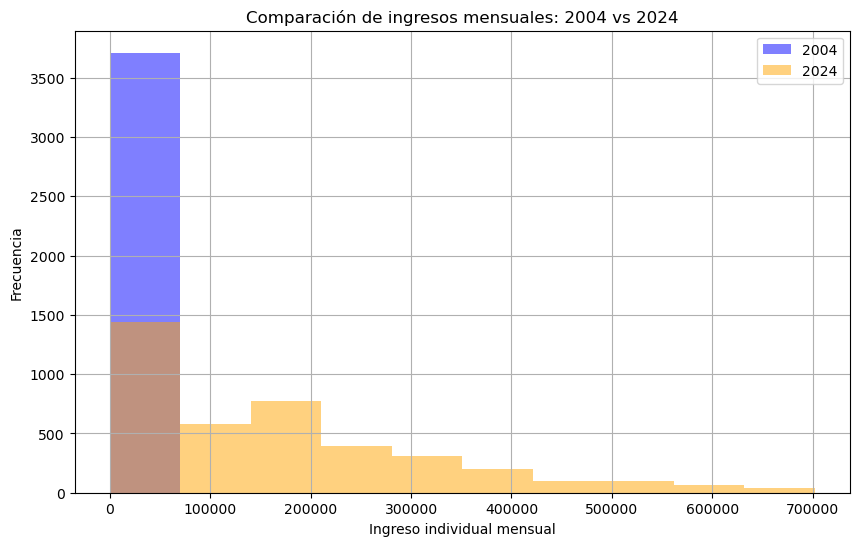

In [564]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo
df = pd.read_stata(r"/Users/zowi/Desktop/Big Data/GitHub/E337-Grupo3\df_filtrado.dta")

# Filtrar personas que reportaron su condición de actividad
df = df[df['estado'].isin([1, 2, 3])]

# Eliminar valores faltantes en ingreso
df = df[df['p47t'].notna()]

# Función para remover outliers
def remover_outliers_std(data, variable):
    mean_value = data[variable].mean()
    std_dev = data[variable].std()
    lower_bound = mean_value - 2 * std_dev
    upper_bound = mean_value + 2 * std_dev
    return data[(data[variable] >= lower_bound) & (data[variable] <= upper_bound)]

# Aplicar la función por año
df = df.groupby('ano4').apply(lambda g: remover_outliers_std(g, 'p47t')).reset_index(drop=True)

# Filtrar solo 2004 y 2024
df = df[df['ano4'].isin([2004, 2024])]

# Crear los datos filtrados por año
ingresos_2004 = df[df['ano4'] == 2004]['p47t']
ingresos_2024 = df[df['ano4'] == 2024]['p47t']

# Establecer rango común para los histogramas
min_ing = min(ingresos_2004.min(), ingresos_2024.min())
max_ing = max(ingresos_2004.max(), ingresos_2024.max())
rango_comun = (min_ing, max_ing)

# Graficar
plt.figure(figsize=(10, 6))
plt.hist(ingresos_2004, bins=10, alpha=0.5, color='blue', label='2004', range=rango_comun)
plt.hist(ingresos_2024, bins=10, alpha=0.5, color='orange', label='2024', range=rango_comun)
plt.xlabel('Ingreso individual mensual')
plt.ylabel('Frecuencia')
plt.title('Comparación de ingresos mensuales: 2004 vs 2024')
plt.legend()
plt.grid(True)
plt.show()


Parte 3 punto 2a

In [530]:
# Crear variable binaria: 1 si persona está desocupada, 0 si no
df['desocupado'] = (df['estado'] == 2).astype(int)

# Agrupar por hogar y calcular si algún miembro está desocupado
df['hogar_con_desocupado'] = df.groupby('codusu')['desocupado'].transform('max')


Parte 3 punto 2b

In [532]:
# Filtrar personas ocupadas y con ingreso positivo
cond_ocupado_ingreso = (df['estado'] == 1) & (df['p47t'] > 0)

# Crear variable auxiliar con ingresos válidos, NaN en caso contrario
df['ingreso_ocupado_valido'] = df['p47t'].where(cond_ocupado_ingreso, 0)

# Sumar ingresos válidos por hogar
df['ingreso_hogar_ocupados'] = df.groupby('codusu')['ingreso_ocupado_valido'].transform('sum')

df.to_stata(r"C:\Users\caval\Downloads\df_ingreso_hogar_ocupados.dta", write_index=False)